# Predicting Loss in Auto Imports Data
Created by Rhys Mallia : S3656436
   
   Group 161

## Introduction
The objective of this project is to predict the average loss per year for an insured vehicle with an emulated version of the 1985 Auto Imports database using multiple linear regression.

We use the `Statsmodels` module in this task with python version >= 3.7.6.

The dataset was sourced from OpenML at https://www.openml.org/d/248 <cite data-cite="BNG(Autos)"> (Jan Van Rijn, 2014) </cite>.


Based on the original dataset sourced from OpenML at https://www.openml.org/d/9 <cite data-cite="Autos"> (Jan Van Rijn, 2014) </cite>.
    
This report consists of the following sections:
- The [Overview](#Overview) section describes the data source in detail, as well as the features and target of the dataset.


- The [Data Preperation](#Data-Preperation) section covers in detail the cleaning and preperation of the dataset in order to proceed forward with exploration.


- The [Data Exploration](#Data-Exploration) sections explores the dataset in detail including numerical summeries and graphs.


- The [Statistical Modeling & Performance Evaluation](#Statistical-Modeling-and-Performance-Evaluation) section seeks to fit a multiple linear regression model with associated diagnostic checks onto the dataset; Following this, a backwards variable selection using p-values is performed to obtain a reduced model, after which another set of diagnostic checks are performed to verify the reduced model.


- The [Summary and Conclusion](#Summary-And-Conclusions) section provides a summary of the project and presents the findings relating to the goals and objectives set out in this report.


## Overview
### Data Source

This dataset was provided by OpenML; `BNG(Autos)` is an emulated dataset based on the real world 1985 insurance dataset `Autos` released under the same author <cite data-cite="BNG(Autos)"> (Jan Van Rijn, 2014) </cite>.

This dataset contains information on 3 major components; The specificaiton of an auto vehicle in terms of various industry metrics including body and engine specifications, the assigned insurance rating associated to the vehicle, and it's normalized losses per year.

The `Autos` dataset contains 205 observations (known as instances or records) while the `BNG(Auto)` dataset contains 1,000,000 observations.
Both datasets contain 26 descriptive features (known as independent features) and one target (known as a response, or depedent feature). 


In this project, we will use the sample of 5000 observations from the `BNG(Auto)` dataset as `Autos` does not contain enough observations after preperation to allow for an accurate model.

Included with this project is a snippet of the original `BNG(Auto)` dataset which contains 10,000 observations for use with the model and for ease of use as the original dataset is over 200MB's in size.

### Project Objective
Our goal in this project is to see if we can predict a vehicle's yearly losses (or deprecation) within an acceptable margin of error using multiple linear regression.

### Target Feature

The target feature of this project is `Normalized-Losses`, which is a continuous numerical feature that represents the average loss per car per year.

Therefore, our project is on a regression problem.

### Descriptive Features

| Name | Data type | Units | Description 
| :-: | :-:  | :-:  | :-:  |
| Symboling | Ordinal | Numeric | The asssigned insurance rating of a vehicle, where +3 is the upper limit and refers to 'Risky' whereas a -3 is "Pretty safe".| 
| Normalized-Losses | Continuous | US Dollars | The average loss per car per year. | 
| Make | Nominal | Unknown | The make of the vehicle. | 
| Fuel-Type | Binary | Unknown | The fuel type of the vehicle, either diesel or gas. | 
| Aspiration | Binary | Unknown | The fuel aspiration properties of the vehicle, either standard or turbo | 
| Num-of-doors | Binary | Numeric | The number of doors, either two or four.  | 
| Body style | Nominal | Unknown | The body design of the vehicles, for example sedan or hatch. |
| Drive-wheels | Nominal | Unknown | The driving options associated to the vehicle, for example 4WD or AWD. | 
| Engine-Location | Binary | Unknown | The location for the engine, either in the rear or front. | 
| Wheel-base | Continuous | Inches | The horizontal distance between the centers of the rear and front wheels. | 
| Length | Continuous | Inches | The length of the vehicle from front to back. | 
| Width | Continuous | Inches | The width of the vehicle. | 
| Height | Continuous | Inches | The height of the vehicle. |
| Curb Weight | Continuous | (US) Pounds | The total mass of the vehicle with standard equipment. | 
| Engine-type | Nominal | Unknown | The type of installed engine in the vehicle | 
| Num-of-Cylinders | Nominal | Numeric | The number of cylinders within the vehicles engine. | 
| Engine-size | Continuous | Inches | The dimensions of the engine. | 
| Fuel-system | Nominal | Unknown | The type of fuel injection system in the vehicle.| 
| Bore | Continuous | Inches | The diameter of each cylinder inside the engine. | 
| Stroke | Continous | Inches | The length that the piston travels during an engine cycle. | 
| Compression-ratio | Continuous | Numeric | The ratio of the volume of the cylinder and the combustion chamber when the piston is at its most extended. | 
| Horsepower | Continuous | Horsepower | The horsepower, or forcefulness of the vehicle's engine. | 
| Peak-rpm | Continuous | RPM | The maximum rotations of the engine's crankshaft per minute. | 
| City-mpg | Continuous | Miles | The average miles per gallon the vehicle achives in a city enviroment. | 
| Highway-mpg | Continuous | Miles | The average miles per gallon the vehicle achives in while driving on a freeway. | 
| Price | Continuous | US Dollars | The price the vehicle is sold for. | 



Most of the descriptive features which units state unknown contain a range of categorical terms or words associtated to different values.

## Data Preperation
### Preliminaries
First, we import all the common modules that we will use throughout the project, including any extra specifications we must adhere to.

In [1]:
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
###
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 
###
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

We will read the dataset directly from disk, and sample 5000 observations in order to proceed through the rest of this project.

In [2]:
# Reading the CSV file with Pandas
autos = pd.read_csv("Group161_Project.csv")

# Taking a sample of 5000 observations from the larger dataset
autos = autos.sample(5000)

#Rounding the numerical values to have 3 decimal places
autos = autos.round(3)

# Displaying 10 randomly selected rows
autos.sample(10)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
7261,81.067,plymouth,diesel,turbo,four,sedan,fwd,front,96.927,171.651,64.671,58.105,2308.505,l,four,111.048,idi,3.535,3.826,8.585,85.034,4303.929,28.736,32.680,8470.177,0.0
5446,197.055,jaguar,gas,std,two,hatchback,fwd,front,97.582,186.255,65.889,54.809,2499.755,rotor,four,113.746,mpfi,3.161,2.675,8.501,63.422,5755.815,23.786,29.657,16286.328,3.0
5133,91.578,chevrolet,gas,std,two,hatchback,4wd,front,102.566,158.041,65.994,56.062,1961.239,l,four,102.542,2bbl,3.001,3.409,15.665,60.788,5464.281,19.929,24.232,6636.894,1.0
8490,156.072,chevrolet,gas,std,four,sedan,fwd,front,95.254,175.235,64.741,49.626,2241.953,ohc,four,107.254,mpfi,3.544,3.306,9.000,90.875,5750.606,23.879,30.060,8084.507,2.0
1004,132.198,mercedes-benz,gas,turbo,two,hatchback,fwd,rear,109.473,180.173,66.828,54.508,3729.614,ohcf,four,122.673,mpfi,3.499,2.468,9.360,68.297,5659.252,20.965,21.360,11302.411,3.0
7462,71.632,subaru,gas,std,four,sedan,rwd,front,89.761,188.623,68.825,50.401,3396.428,ohcv,twelve,203.292,mpfi,2.937,3.157,18.918,185.356,5208.046,16.966,34.443,17506.022,0.0
8565,74.259,plymouth,gas,turbo,two,hatchback,fwd,front,92.222,167.955,64.782,54.560,2274.833,ohc,two,127.869,mpfi,3.468,3.306,9.000,70.311,4280.689,33.780,36.978,27218.350,3.0
8821,122.061,renault,gas,std,four,sedan,rwd,front,93.028,158.202,72.322,58.283,3014.316,ohcv,six,163.693,2bbl,3.149,2.375,9.217,62.533,5462.252,24.667,31.972,7808.717,1.0
5608,72.067,dodge,gas,std,two,hatchback,4wd,front,95.898,171.129,70.918,55.737,3668.452,l,three,96.565,mpfi,3.151,3.412,7.478,215.586,4796.999,17.375,19.351,15529.826,3.0
9662,90.585,alfa-romero,gas,std,four,sedan,fwd,front,94.663,200.036,66.773,55.097,2887.426,ohc,four,154.215,mpfi,2.948,3.689,9.301,155.620,5107.907,17.213,25.005,9128.586,1.0


## Data Cleaning and Transformation
First, we must confirm that the feature types match the descriptions outlined by the creator of the dataset and by our sample system.

In [3]:
print(f"The shape of the dataset is {autos.shape} \n")
print(f"The data types are listed below, where 'objects' refers to a string type: ")
print(autos.dtypes)

The shape of the dataset is (5000, 26) 

The data types are listed below, where 'objects' refers to a string type: 
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
symboling            float64
dtype: object


## Checking for Missing Values
We then proceed to check the dataset for any missing columns in any of the rows, this can be shown as either a null character or a question mark.


In [4]:
print(f"\nNumer of missing values for each feature:")
print(autos.isnull().sum())


Numer of missing values for each feature:
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
dtype: int64


There appears to be no missing values, and no values that are associated to ?.

### Summary Statistics

In [5]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
autos.describe(include='float64')

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,114.010226,98.686528,173.936539,65.802856,53.734490,2531.191285,123.422203,3.320821,3.243074,9.971677,103.125141,5119.548853,24.646756,29.926498,13070.320921,0.80160
std,35.338481,5.976371,11.725252,2.081864,2.453086,505.615000,40.043211,0.268306,0.315419,3.788290,39.191524,540.362801,6.368980,6.454988,7757.961215,1.26529
min,53.160000,85.680000,141.428000,61.602000,47.602000,1621.580000,56.045000,2.685000,2.048000,-3.098000,47.582000,3742.778000,11.600000,14.149000,820.703000,-3.00000
25%,85.429000,94.963250,167.469250,64.280750,52.012000,2166.649500,98.182250,3.119750,3.113000,8.524750,73.348500,4792.892000,19.583000,25.406250,7897.762500,0.00000
50%,103.086500,96.991500,173.178500,65.505500,53.858000,2425.319000,111.946500,3.322000,3.276000,9.000000,93.931500,5085.437500,24.098000,29.799000,10423.651500,1.00000
75%,138.664500,101.406250,181.000250,66.752000,55.336000,2861.331250,134.309750,3.543000,3.414000,9.348000,117.361750,5473.732250,28.318250,33.335250,15390.282000,2.00000
max,262.652000,119.887000,209.518000,74.072000,61.716000,4245.550000,356.763000,3.976000,4.249000,35.414000,257.268000,6747.982000,47.207000,54.621000,51698.796000,3.00000


In [6]:
display(HTML('<b>Table 1: Summary of catagorical features</b>'))
autos.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,514,4457,4059,2795,2187,2404,4856,2781,2863,2128


### Continuous Features
As Symboling mainly refers to a cumulation of other data, and by itself contains no real predicting power we will remove it from the dataset.


In [7]:
autos = autos.drop('symboling', 1)
autos.shape

(5000, 25)

Based on the graphic summary stated above, the minimal cost of a vehicle appears to be negative, which does not make sense in the case of this dataset.

herefore, we must remove those values.

In [8]:
autos = autos[autos['price'] > 0]
autos.shape

(5000, 25)

### Fixing Column Names
Some of the included column names contain a minus sign, which can cause problems when modeling. When it comes to writing our regression forumula, the minus sign will be misinterpreted as a command to 'exlude' the variable.

For this reason, we replace the column names minus sign with an underscore.

In [9]:
autos.columns = [colname.replace('-', '_') for colname in list(autos.columns)]
autos.head()

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
5831,114.361,mitsubishi,gas,std,two,hatchback,fwd,front,91.991,163.925,63.588,56.009,1900.899,ohc,four,94.629,mpfi,3.511,3.777,9.000,96.709,6058.530,24.818,29.935,6178.909
1272,121.032,peugot,gas,std,two,sedan,rwd,front,99.729,172.939,70.366,55.027,2571.976,l,four,112.479,mpfi,3.311,3.160,8.519,61.851,4409.924,19.725,30.106,9865.582
799,128.365,porsche,gas,std,two,hardtop,rwd,front,95.639,201.869,70.208,55.278,3233.617,l,four,140.792,mpfi,3.727,2.460,9.000,96.719,4791.711,24.065,27.322,13770.988
1254,185.169,volvo,gas,std,two,wagon,fwd,front,98.527,173.531,65.193,52.974,2133.525,ohc,five,131.962,2bbl,3.308,3.583,8.025,219.142,4440.939,19.290,19.594,6924.548
6469,84.778,isuzu,gas,std,two,hatchback,rwd,front,115.668,195.244,69.179,52.587,3372.494,dohc,two,140.574,1bbl,3.728,3.075,9.352,70.475,6211.555,29.260,30.106,27033.665


### Caregorical Features
As our catagorical features each contain a unique range of strings, or as referred to by the `pandas` module, objects, we will print each set to ensure there are no issues based on their formatting.


In [10]:
autosColumns = autos.columns[autos.dtypes == object].tolist()

for col in autosColumns:
    print('Unique values for ' + col)
    print(autos[col].unique())
    print('')

Unique values for make
['mitsubishi' 'peugot' 'porsche' 'volvo' 'isuzu' 'mazda' 'bmw' 'nissan'
 'subaru' 'volkswagen' 'renault' 'jaguar' 'plymouth' 'honda' 'toyota'
 'audi' 'alfa-romero' 'chevrolet' 'mercedes-benz' 'dodge' 'saab' 'mercury']

Unique values for fuel_type
['gas' 'diesel']

Unique values for aspiration
['std' 'turbo']

Unique values for num_of_doors
['two' 'four']

Unique values for body_style
['hatchback' 'sedan' 'hardtop' 'wagon' 'convertible']

Unique values for drive_wheels
['fwd' 'rwd' '4wd']

Unique values for engine_location
['front' 'rear']

Unique values for engine_type
['ohc' 'l' 'dohc' 'ohcf' 'dohcv' 'ohcv' 'rotor']

Unique values for num_of_cylinders
['four' 'five' 'two' 'twelve' 'eight' 'six' 'three']

Unique values for fuel_system
['mpfi' '2bbl' '1bbl' '4bbl' 'spdi' 'spfi' 'idi' 'mfi']



These values are almost perfect, except for the minus sign within the value of make. This minus sign as stated above will cause problems when the model is run through the `statsmodels` module. We will replace this minus sign with an underscore in order to fix this error.

In [11]:
for col in autosColumns:
    autos[col] = autos[col].str.replace('-', '_')

In [12]:
autos['make'].unique()

array(['mitsubishi', 'peugot', 'porsche', 'volvo', 'isuzu', 'mazda',
       'bmw', 'nissan', 'subaru', 'volkswagen', 'renault', 'jaguar',
       'plymouth', 'honda', 'toyota', 'audi', 'alfa_romero', 'chevrolet',
       'mercedes_benz', 'dodge', 'saab', 'mercury'], dtype=object)

## Data Exploration
As our dataset has now completed the cleaning and transformation process, we can use it for visualisation and statistical modeling.

### Univariate Visualisation
Let's create some graphs for the features.

First, a histogram of `price`.


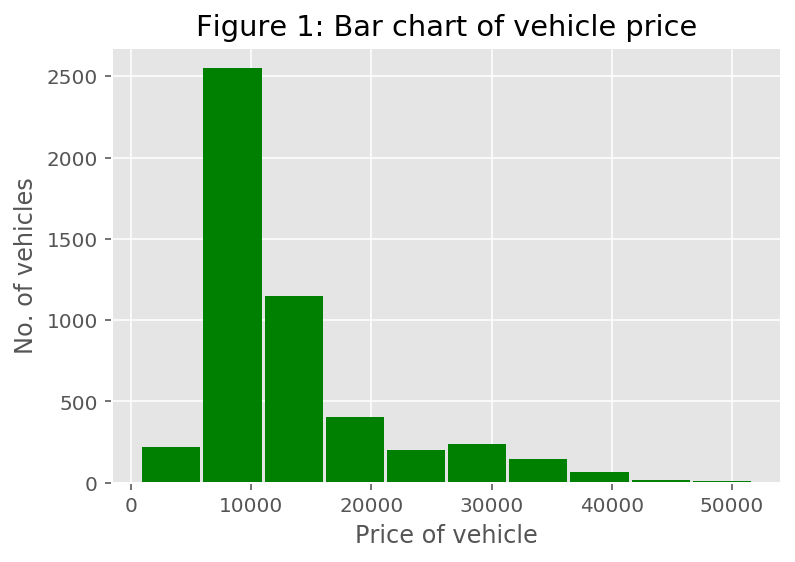

In [13]:
#Creating a histogram of price
priceHist = autos['price']
plt.hist(priceHist, rwidth=0.95, color='g')
plt.xlabel("Price of vehicle")
plt.ylabel("No. of vehicles")
plt.title('Figure 1: Bar chart of vehicle price')
plt.show();

Let's now display a boxplot and histogram for `normalized_losses`. Figure two shows that this variable is right-skewed and contains many outliers.

The median appears to sit around the 100 dollars mark, with a lower quartile of 50 and an upper quartile of 215.

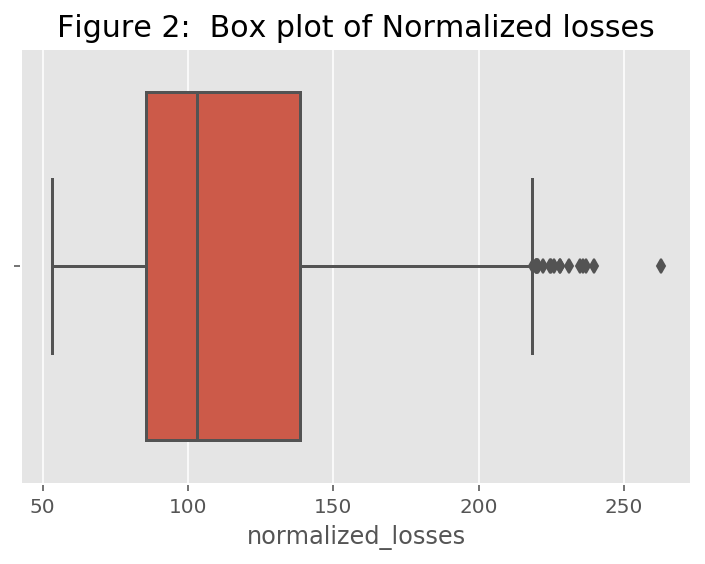

In [14]:
#Creating a boxplot for normalized losses
sns.boxplot(autos['normalized_losses']).set_title('Figure 2:  Box plot of Normalized losses', fontsize = 15)
plt.show();

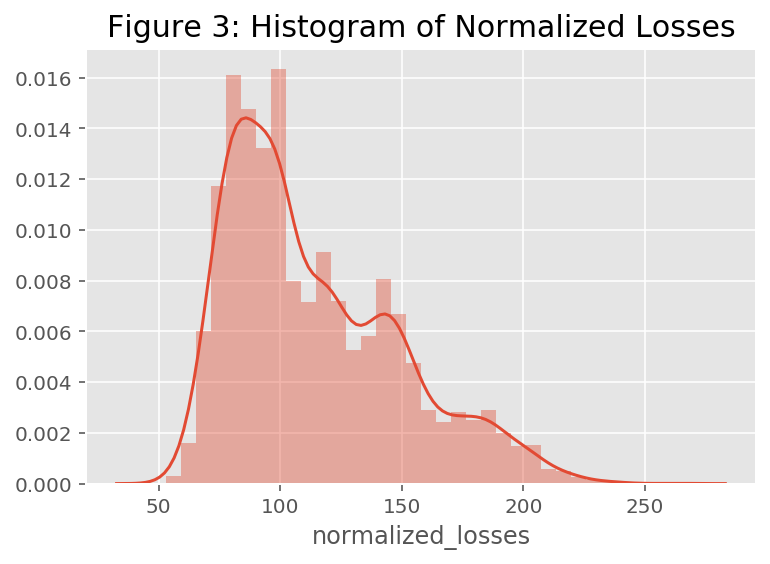

In [15]:
# Creating a histogram of losses with a kernal density estimate
sns.distplot(autos['normalized_losses'], kde = True).set_title('Figure 3: Histogram of Normalized Losses', fontsize = 15)
plt.show();

### Multivariate Visualisation
#### Scatter plot of Numeric Features and Age
The scatterplot in figure 4 shows no clear correlation between horse power and losses

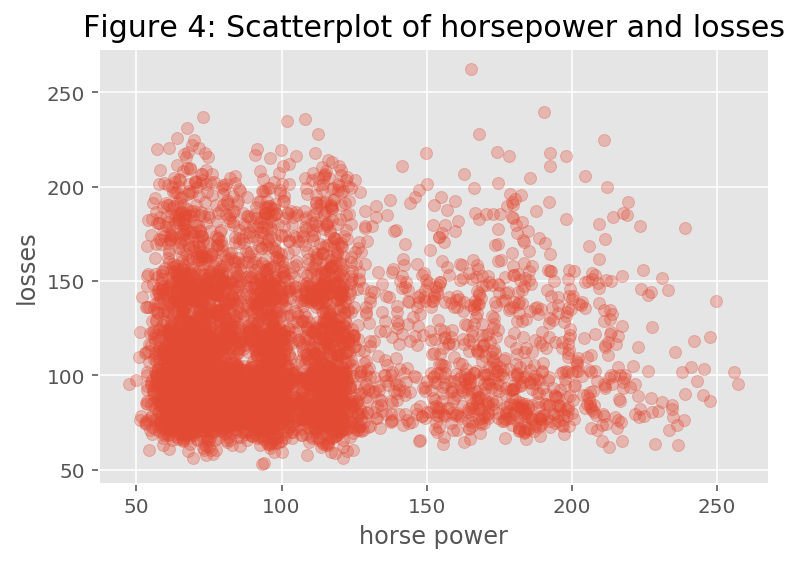

In [16]:
#Creating a scatter plot of losses against horse power
plt.scatter(autos['horsepower'], autos['normalized_losses'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of horsepower and losses', fontsize = 15)
plt.xlabel('horse power')
plt.ylabel('losses')
plt.show();

The scatterplot in figure 5 shows no clear correlation between price and losses

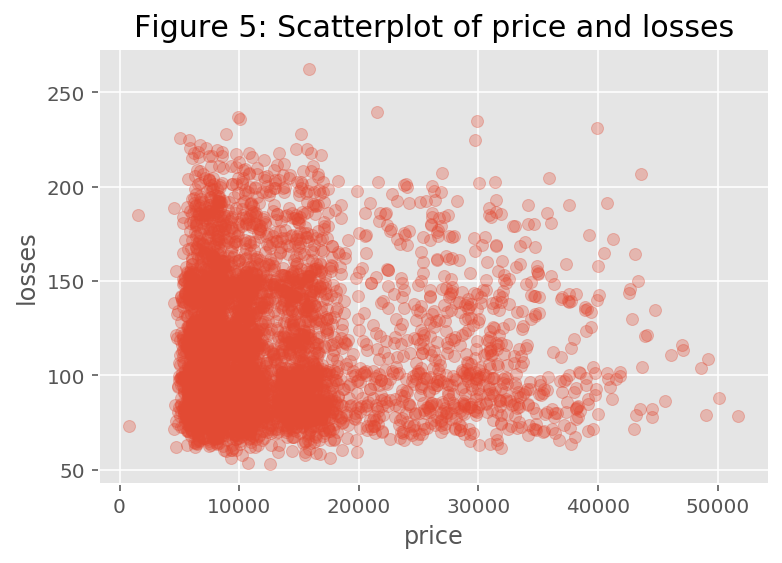

In [17]:
#Creating a scatter plot of losses against price
plt.scatter(autos['price'], autos['normalized_losses'], alpha = 0.3)
plt.title('Figure 5: Scatterplot of price and losses', fontsize = 15)
plt.xlabel('price')
plt.ylabel('losses')
plt.show();

#### Categorical Attributes by Age

We can see that the distribution of losses between each make is similar, with two large groups sticking out between the makes.

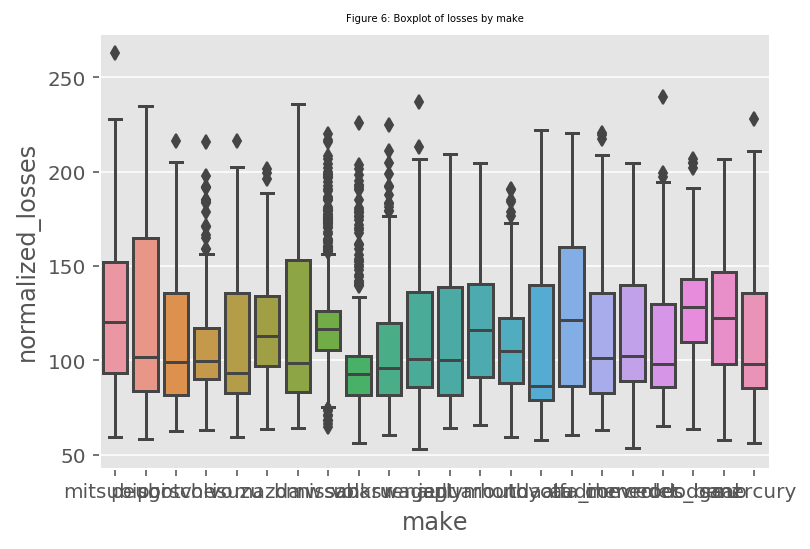

In [18]:
# Creating a boxplot for make and losses
# Seaborn does not allow for gaps in the blox plots, the text below the boxplots
# is extremely hard to see but I cannot fix it!
sns.boxplot(autos['make'], autos['normalized_losses']);
plt.title('Figure 6: Boxplot of losses by make', fontsize = 5)
plt.show();

We can see that the distribution of losses between each body style varies, with a large group having similar higher median losses (presumably the higher priced brands) and another set (which would be assumed to be the more affordable car brand) sitting with a similar lower median of losses.

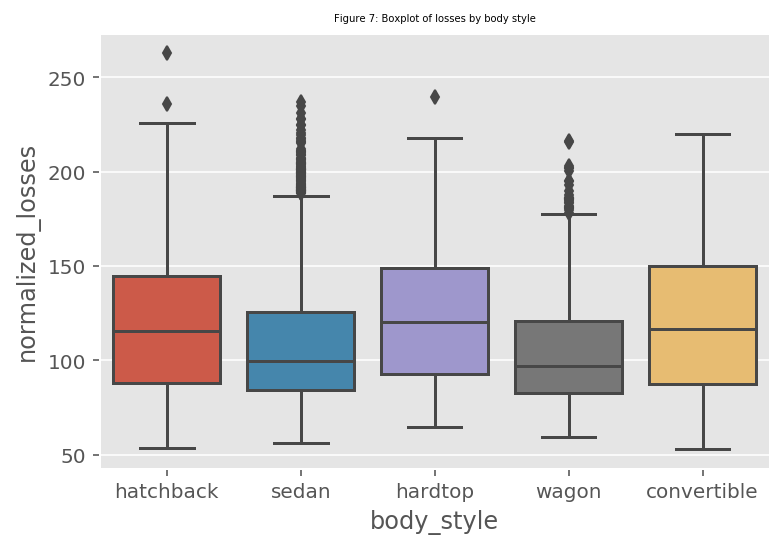

In [19]:
# Creating a boxplot for body-style and losses
sns.boxplot(autos['body_style'], autos['normalized_losses']);
plt.title('Figure 7: Boxplot of losses by body style', fontsize = 5)
plt.show();

We can see that the distribution of losses between number of cylinders is similar.

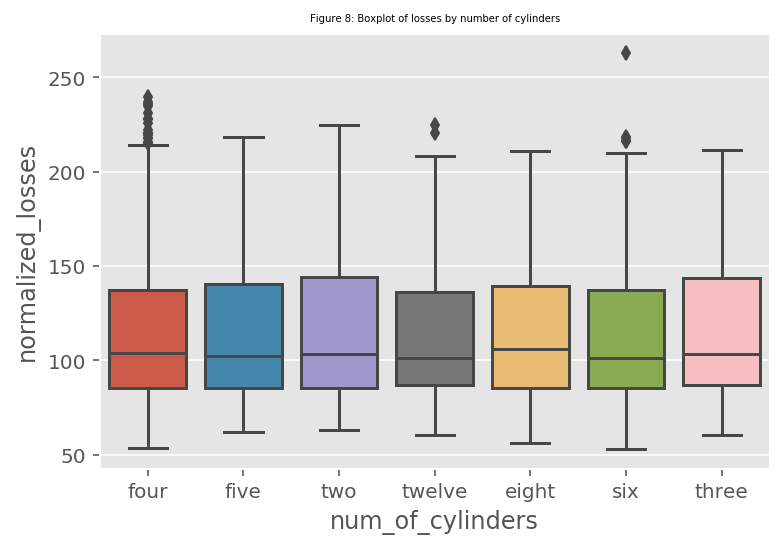

In [20]:
# Creating a boxplot for number of cylinders and losses
sns.boxplot(autos['num_of_cylinders'], autos['normalized_losses']);
plt.title('Figure 8: Boxplot of losses by number of cylinders', fontsize = 5)
plt.show();

The distribution of losses between num_of_cylinders appears to be similar to figure 7.

## Statistical Modeling and Performance Evaluation

### Creating the Full Model
In order to create a full model, we use all of the available features within the dataframe. 


In [21]:
autos.head()

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
5831,114.361,mitsubishi,gas,std,two,hatchback,fwd,front,91.991,163.925,63.588,56.009,1900.899,ohc,four,94.629,mpfi,3.511,3.777,9.000,96.709,6058.530,24.818,29.935,6178.909
1272,121.032,peugot,gas,std,two,sedan,rwd,front,99.729,172.939,70.366,55.027,2571.976,l,four,112.479,mpfi,3.311,3.160,8.519,61.851,4409.924,19.725,30.106,9865.582
799,128.365,porsche,gas,std,two,hardtop,rwd,front,95.639,201.869,70.208,55.278,3233.617,l,four,140.792,mpfi,3.727,2.460,9.000,96.719,4791.711,24.065,27.322,13770.988
1254,185.169,volvo,gas,std,two,wagon,fwd,front,98.527,173.531,65.193,52.974,2133.525,ohc,five,131.962,2bbl,3.308,3.583,8.025,219.142,4440.939,19.290,19.594,6924.548
6469,84.778,isuzu,gas,std,two,hatchback,rwd,front,115.668,195.244,69.179,52.587,3372.494,dohc,two,140.574,1bbl,3.728,3.075,9.352,70.475,6211.555,29.260,30.106,27033.665


We then need to construct a formula for regression, this can be done quickly in python rather than manually adding all of the independent features, which in this dataset is a large amount.


In [22]:
formula_string_varibles = ' + '.join(autos.drop(columns='normalized_losses').columns)
formula_string = 'normalized_losses ~ ' + formula_string_varibles
print('formula_string: ', formula_string)

formula_string:  normalized_losses ~ make + fuel_type + aspiration + num_of_doors + body_style + drive_wheels + engine_location + wheel_base + length + width + height + curb_weight + engine_type + num_of_cylinders + engine_size + fuel_system + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg + price


This regression formula works well, however as many of our features are categorical, we must use one-hot-encoding to convert them into a usable format.


In [23]:
data_one_hot = pd.get_dummies(autos, drop_first=True)
data_one_hot.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes_benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
5831,114.361,91.991,163.925,63.588,56.009,1900.899,94.629,3.511,3.777,9.000,96.709,6058.530,24.818,29.935,6178.909,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1272,121.032,99.729,172.939,70.366,55.027,2571.976,112.479,3.311,3.160,8.519,61.851,4409.924,19.725,30.106,9865.582,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
799,128.365,95.639,201.869,70.208,55.278,3233.617,140.792,3.727,2.460,9.000,96.719,4791.711,24.065,27.322,13770.988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1254,185.169,98.527,173.531,65.193,52.974,2133.525,131.962,3.308,3.583,8.025,219.142,4440.939,19.290,19.594,6924.548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6469,84.778,115.668,195.244,69.179,52.587,3372.494,140.574,3.728,3.075,9.352,70.475,6211.555,29.260,30.106,27033.665,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
data_one_hot.shape

(5000, 65)

Now that we have encoded the categorical variables into a usable format via one-hot-encoding, we can now produce a new variable formula for use in multi linear regression.

In [25]:
#Creating the new regression formula including the one hot encoding
formula_string_variables_encoded = ' + '.join(data_one_hot.drop(columns='normalized_losses').columns)
formula_string_encoded = 'normalized_losses ~ ' + formula_string_variables_encoded

#We are unable to print the entire string on jupiter notebook
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  normalized_losses ~ wheel_base + length + width + height + curb_weight + engine_size + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg + price + make_audi + make_bmw + make_chevrolet + make_dodge + make_honda + make_isuzu + make_jaguar + make_mazda + make_mercedes_benz + make_mercury + make_mitsubishi + make_nissan + make_peugot + make_plymouth + make_porsche + make_renault + make_saab + make_subaru + make_toyota + make_volkswagen + make_volvo + fuel_type_gas + aspiration_turbo + num_of_doors_two + body_style_hardtop + body_style_hatchback + body_style_sedan + body_style_wagon + drive_wheels_fwd + drive_wheels_rwd + engine_location_rear + engine_type_dohcv + engine_type_l + engine_type_ohc + engine_type_ohcf + engine_type_ohcv + engine_type_rotor + num_of_cylinders_five + num_of_cylinders_four + num_of_cylinders_six + num_of_cylinders_three + num_of_cylinders_twelve + num_of_cylinders_two + fuel_system_2bbl + fuel_system_4bbl 

Now that the regression formula has been converted into a python string, we fit this formula onto an OLS (Ordinary least squares) model.

In [26]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_one_hot)
full_fitted = model_full.fit()
print(full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_losses   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     8.368
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           4.91e-71
Time:                        12:30:41   Log-Likelihood:                -24661.
No. Observations:                5000   AIC:                         4.945e+04
Df Residuals:                    4935   BIC:                         4.988e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The full model create using the variables inside of the `BNG(Autos)` dataset has an adjusted R-squared value of 0.086. This can be interperted as only 0.086% of the variance is explained by the model.

Looking at the p-values for each of the variables, it is observed that many of them have extremely high p-values, with a few being highly significant. 

We can now create a new data frame for the actual values vs. the predicted values, and the residuals for the full model.

We can use this data frame to plot predicted values and the regression residuals.

In [27]:
full_df = pd.DataFrame({'actual': data_one_hot['normalized_losses'],
                       'predicted': full_fitted.fittedvalues,
                       'residual': full_fitted.resid})
full_df.head(10)

,actual,predicted,residual
5831,114.361,129.738819,-15.377819
1272,121.032,130.150272,-9.118272
799,128.365,115.687643,12.677357
1254,185.169,111.466112,73.702888
6469,84.778,122.524824,-37.746824
7682,82.710,106.366075,-23.656075
5578,79.482,110.459565,-30.977565
8907,118.340,126.574915,-8.234915
6319,92.836,91.251353,1.584647
5053,116.896,115.363866,1.532134


We can now create plots of the actual values vs. the predicted values

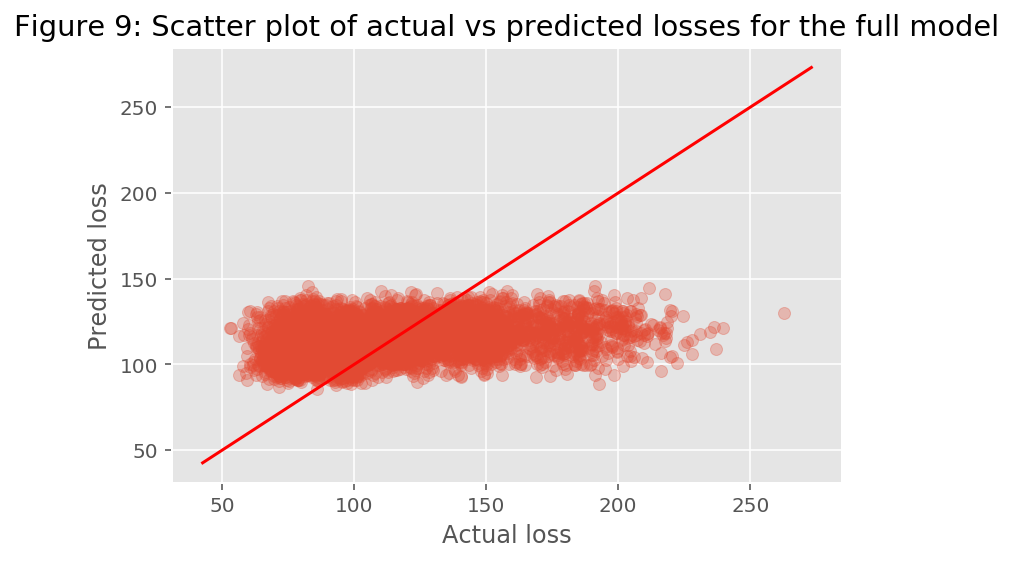

In [28]:
#creating a scatter plot of predicted losses vs actual losses
plt.scatter(full_df['actual'], full_df['predicted'], alpha=0.3)

#Plotting line of fit for the graph
line_min, line_max = plt.gca().get_xlim()
plt.plot([line_min, line_max], [line_min*1+0, line_max*1+0], c="red")

plt.xlabel('Actual loss')
plt.ylabel('Predicted loss')
plt.title('Figure 9: Scatter plot of actual vs predicted losses for the full model')
plt.show()

Based on the information from figure 9, we observe that the full model never predicts loss above 150 even though the full dataset contains values up to 260.

The predictions seem to resinate mainly between the 100 and 150 range and is unable to predict lower and higher levels of loss, where many of the actual values sit.

We will now diagnose the full model to find indications of violations of regression assumptions.

### Full Model Diagnostic Checks
We can diagnose the model to wheck for indications of violations of the regression assumptions, these assumptions are ...
1. Linearity of the relationship between target variable and the independent variables
2. Constant variance of the errors
3. Normality of the residual distribution
4. Statistical independence of the residuals

First we will create a scatter plot of residuals ( as a function of predicted `normalized_losses` )

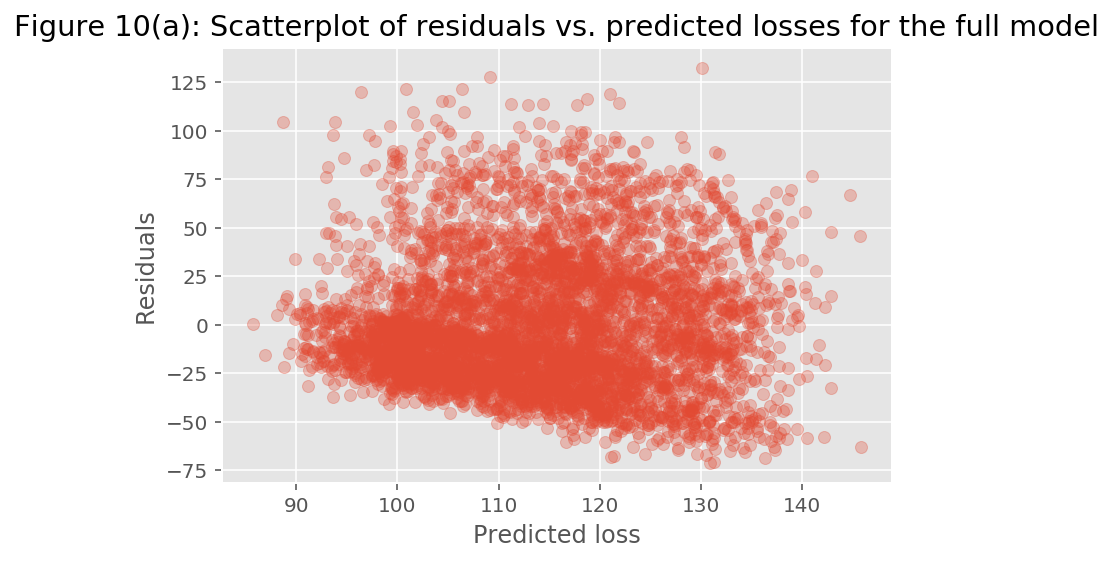

In [29]:
plt.scatter(full_df['predicted'], full_df['residual'], alpha=0.3)
plt.xlabel('Predicted loss')
plt.ylabel('Residuals')
plt.title('Figure 10(a): Scatterplot of residuals vs. predicted losses for the full model')
plt.show()

Based on the information from figure 10(a), we can see that the pattern is mostly random and centers somewhat between 0 and -50, with the rest of the residuals randomly placed elsewhere with no noticable trend.

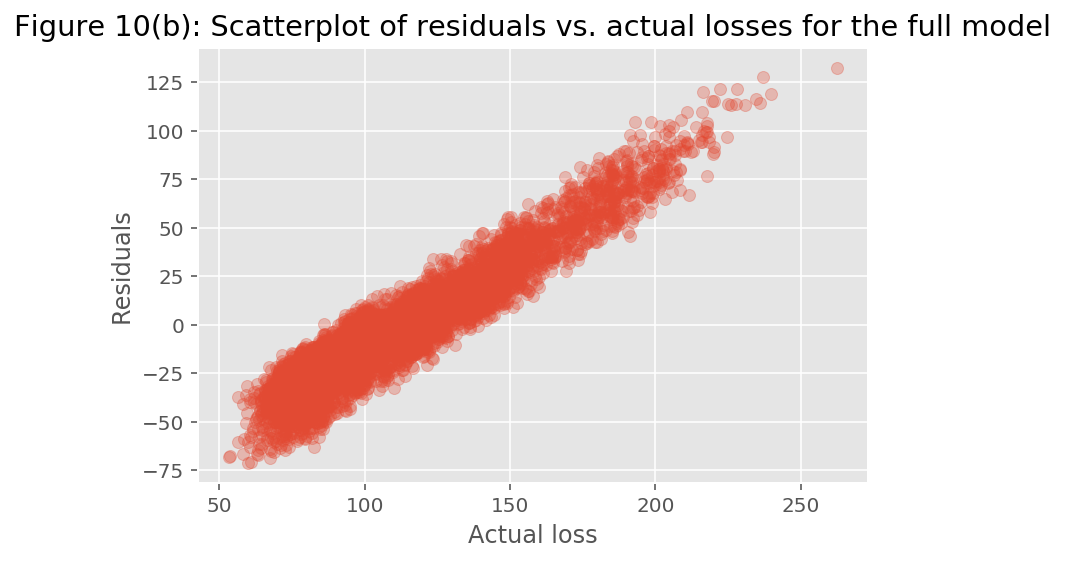

In [30]:
plt.scatter(full_df['actual'], full_df['residual'], alpha=0.3)
plt.xlabel('Actual loss')
plt.ylabel('Residuals')
plt.title('Figure 10(b): Scatterplot of residuals vs. actual losses for the full model')
plt.show()

Based on the information from figure 10(b), we can see that the model over estmates lower losses and under estimates losses at the extreme high end, with a pretty even spread of residuals in an upward trend in the actual losses where our model seems to scatter around the plot.

We can overlay the histograms of actual vs. predicted losses on the same plot.

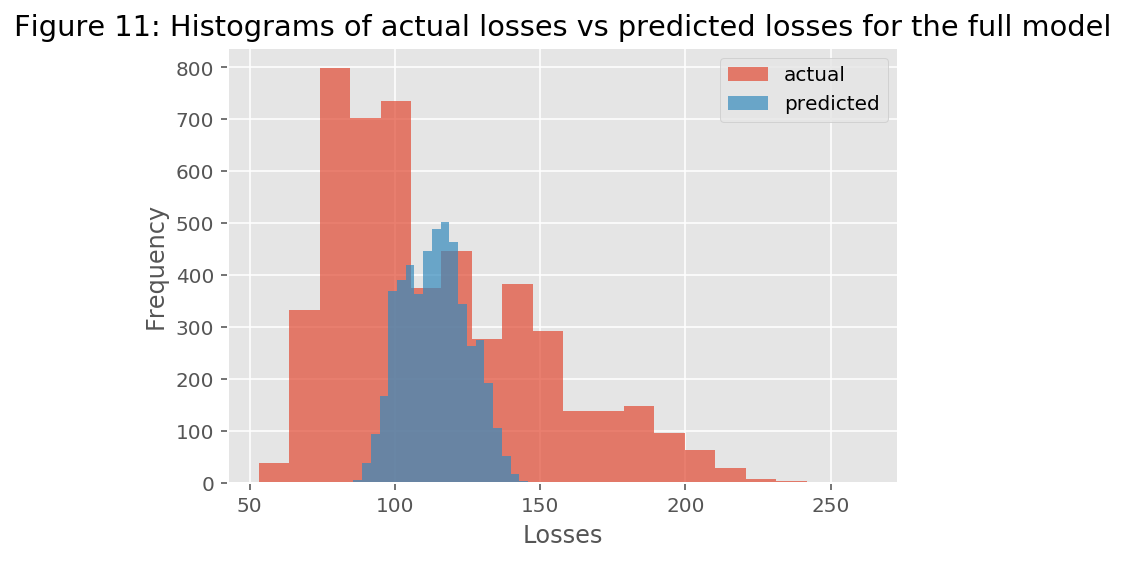

In [31]:
plt.hist(full_df['actual'], label='actual', bins=20, alpha=0.7)
plt.hist(full_df['predicted'], label='predicted', bins=20, alpha=0.7)
plt.xlabel('Losses')
plt.ylabel('Frequency')
plt.title('Figure 11: Histograms of actual losses vs predicted losses for the full model')
plt.legend()
plt.show()

Both of these distributions are very different, specifically the model's predictions are highly clustered around the ~100 - 150 range as noted in the figure 9.

The actual losses have a higher frequency located in the 50 - 100 range.

We can now look at the histogram of residuals.

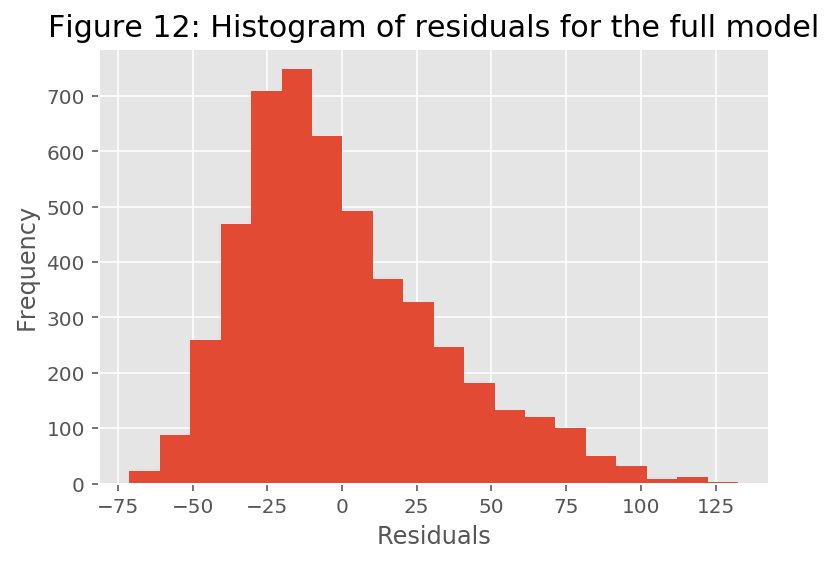

In [32]:
plt.hist(full_df['residual'], bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Figure 12: Histogram of residuals for the full model', fontsize=15)
plt.show()

Based on the information from figure 12, the histogram of residuals appears to have a skew to the right. It seems that the normality asumption of linear regression has not been severely violated in this case as it appears to still be normally distributed.

### Backwards Feature Selection

We now perform backwards feature selection using p-values. This approach consists of the follow steps
1. Start with the full model
2. Drop the variable with the highest p-value and refit a smaller model
3. Repeat until all the variables left in the model are significant

This will leave us with a simplified model that holds only the important variables from the original full model.

The following code has been sourced from FeatureRanking at https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/ <cite data-cite="Regression Case Study"> (featureranking.com, 2020) </cite>.

In [33]:
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)
linreg_fit = full_fitted
# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_one_hot).fit()
    
###
## this is the clean fit after backwards elimination
reduced_fitted = smf.ols(formula = patsy_description, data = data_one_hot).fit()
print(reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {reduced_fitted.f_pvalue:.4f}")


Performing backwards feature selection using p-values:

Removing term "body_style_hardtop" with p-value 0.9904

Removing term "bore" with p-value 0.9508

Removing term "compression_ratio" with p-value 0.9396

Removing term "width" with p-value 0.923

Removing term "make_honda" with p-value 0.9116

Removing term "num_of_cylinders_twelve" with p-value 0.8485

Removing term "horsepower" with p-value 0.8359

Removing term "make_mercedes_benz" with p-value 0.7777

Removing term "wheel_base" with p-value 0.756

Removing term "curb_weight" with p-value 0.7562

Removing term "num_of_cylinders_six" with p-value 0.6994

Removing term "make_isuzu" with p-value 0.686

Removing term "make_volvo" with p-value 0.7239

Removing term "price" with p-value 0.6363

Removing term "fuel_system_mfi" with p-value 0.5989

Removing term "highway_mpg" with p-value 0.5959

Removing term "engine_location_rear" with p-value 0.5533

Removing term "make_volkswagen" with p-value 0.4775

Removing term "engine_type_rot

Based on the summary, we can see that the model's Adjusted R-squared of 0.087, which is a slight improvement from the full model.

With our new reduced model, we can create a new data frame for the predicted vs. actual losses and the residuals associated to them.

In [34]:
reduced_df = pd.DataFrame({'actual': data_one_hot['normalized_losses'],
                          'predicted': full_fitted.fittedvalues,
                          'residual': full_fitted.resid})
reduced_df.head(10)

,actual,predicted,residual
5831,114.361,129.738819,-15.377819
1272,121.032,130.150272,-9.118272
799,128.365,115.687643,12.677357
1254,185.169,111.466112,73.702888
6469,84.778,122.524824,-37.746824
7682,82.710,106.366075,-23.656075
5578,79.482,110.459565,-30.977565
8907,118.340,126.574915,-8.234915
6319,92.836,91.251353,1.584647
5053,116.896,115.363866,1.532134


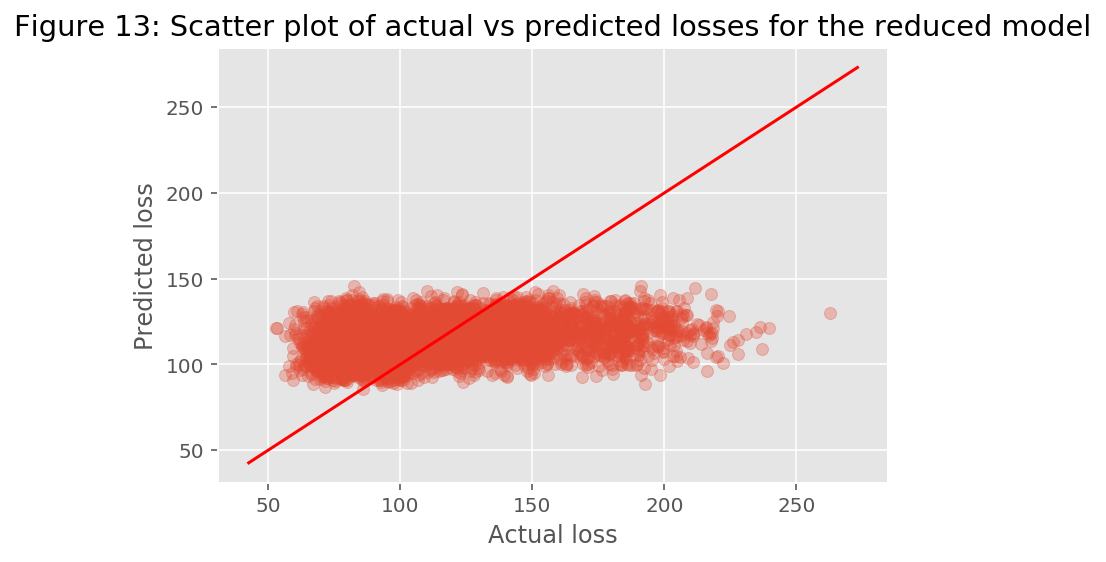

In [35]:
#creating a scatter plot of predicted losses vs actual losses
plt.scatter(reduced_df['actual'], reduced_df['predicted'], alpha=0.3)

#Plotting line of fit for the graph
line_min, line_max = plt.gca().get_xlim()
plt.plot([line_min, line_max], [line_min*1+0, line_max*1+0], c="red")

plt.xlabel('Actual loss')
plt.ylabel('Predicted loss')
plt.title('Figure 13: Scatter plot of actual vs predicted losses for the reduced model')
plt.show();

This model has an associated Adjusted R-squared of 0.087, which is an improvement from the full model.

This can be interpreted as this model explains about 0.087% of the variance, while containing 42 less variables. Each one of the remaining variables are significant based on the 5% level.

Based on the information given in figure 13, we can observe that the reduced model, similar to the full, never predicts loss above 150 even though the full dataset contains values up to 260.

We will now perform the diagnostic check on the reduced model as we did with the full model.

### Reduced Model Diagnostic Checks
We can diagnose the reduced model to wheck for indications of violations of the regression assumptions.

First we will create a scatter plot of residuals ( as a function of predicted `normalized_losses` ).


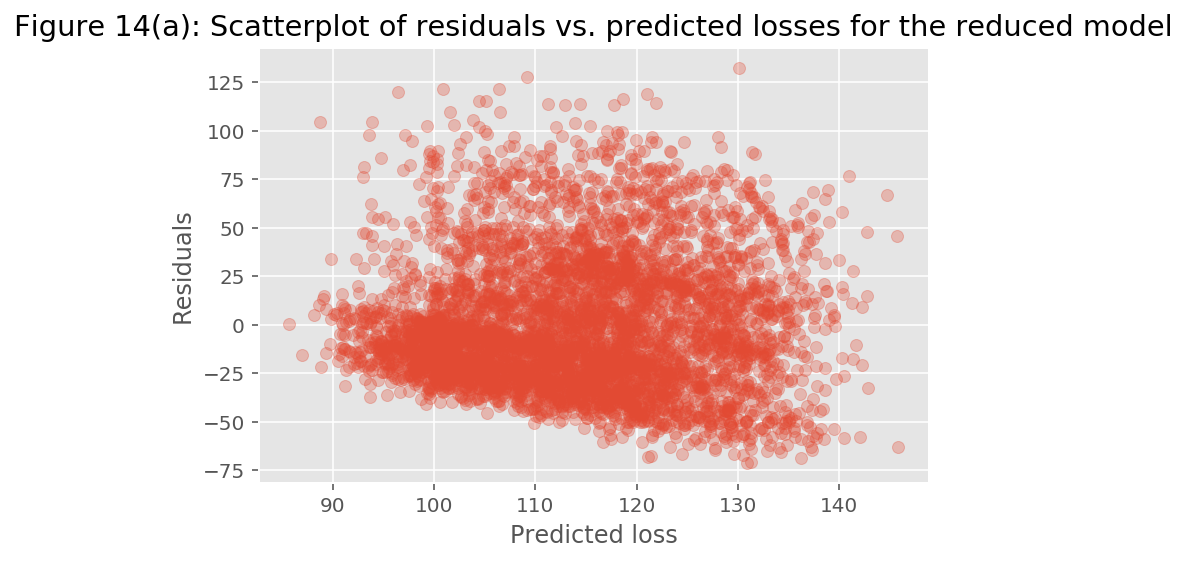

In [36]:
plt.scatter(reduced_df['predicted'], reduced_df['residual'], alpha=0.3)
plt.xlabel('Predicted loss')
plt.ylabel('Residuals')
plt.title('Figure 14(a): Scatterplot of residuals vs. predicted losses for the reduced model')
plt.show()

The information given in figure 14(a) is very similar to figure 10(a), we can see that the residuals suggest a similar random pattern with the same centering.

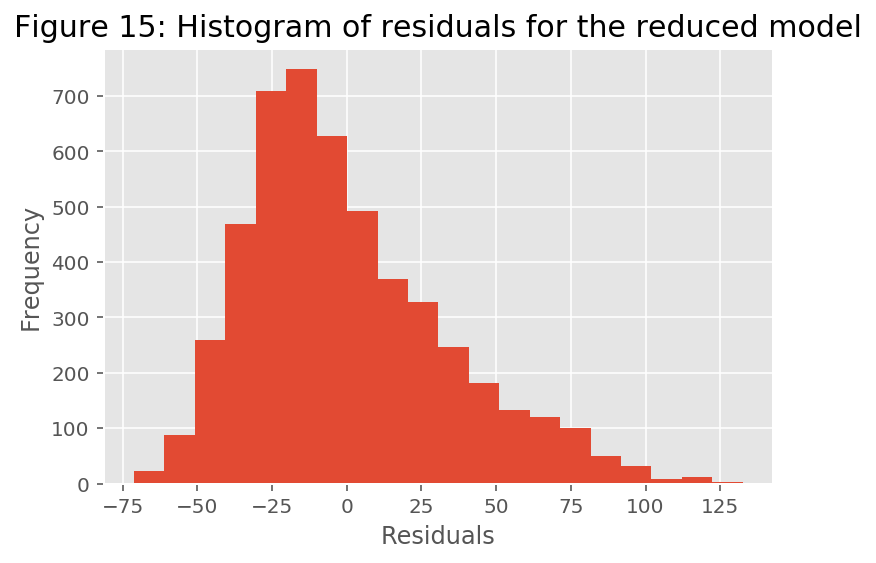

In [37]:
plt.hist(reduced_df['residual'], bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Figure 15: Histogram of residuals for the reduced model', fontsize=15)
plt.show()

The information given in figure 15 is against somewhat similar to figure 12.
The histogram appears to have a right skew but also seems to be normally distributed.

We can use the equation below to find the margin of error associated with the model.

In [38]:
round(max([full_fitted.resid.max(),full_fitted.resid.min()]),2)

132.54

## Summary and Conclusions

Using our independent variables from the `BNG(Autos)` dataset, we were able to produce a model with an adjusted R-squared value of about 0.084%. After using a backwards variable selection with a p-value cutoff of 0.05, we were able to produce a reduced model with a slightly improved adjusted R-squared of 0.087 but with 42 less variables. The final model has 23 variables with a total model p-value of 0.

Diagnostic checks with residual scatter plots indicate that the residuals are somewhat random and not centered around the same range of 0 - 50. This pattern indicates that the constant variability assumption of linear regression has not been satisfied. However, based on the residual histogram, there are no significant violations of the normality assumption.

The final, reduced linear regression model has an Adjusted R-squared value of 0.087%, which is extremely low. This can be interpreted as the model being responsible for 0.087% of the variance in the data. This low value means that the variables we used from the `BNG(Autos)` are not nearly adequate for accurate predicting of the `normalized_losses` in the emulated version of the 1985 Auto Imports database using multiple linear regression.

A different approach to this method may be involving different factors not based on the mechanical aspects of the vehicle but rather on social and financial aspects surrounding the car / import market that may result in a model with a higher Adjusted R-squared value, as these may have a more serious affect on the loss over a period of time.

Another approach may involve some kind of non-linear model such as a neural network or a larger scale dataset rather than the sample we have used here, as both would involve a much larger set of data and a better refined look at which variables are significant.

The regression models is significantly poor at predicting losses. In general, the model has a margain of error of +- 127.32 dollars, which is very large. When compared to the actual values of `normalized_losses`, the model overpredicts values between 100 and 150, where the actual values can range anywhere from 50 to 250 and usually sit around 50 - 100 range. 


As there is a rather large amount of observations, the model is correct in its prediction roughly 500~ times, however overall the model is not useful for any significant use or purpose.



## References
- Jan Van Rijn (2014).  OpenML [online]. Available at
https://www.openml.org/d/248 [Accessed 2020-10-20]

- Feature Ranking [online]. Available at
https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study [Accessed 2020-10-26]